<a href="https://colab.research.google.com/github/dsk40/Newbieron-Tasks/blob/main/Weather_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
df.shape

(21900, 23)

In [ ]:
df.describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm
count,21453.000000,21573.000000,21398.000000,18218.000000,21189.000000,20510.000000,21408.000000,20714.000000,18310.000000,18314.000000,21551.000000,20863.000000
mean,13.030634,24.226283,2.628391,37.645461,12.363585,16.595953,69.244021,51.306894,1018.240573,1015.593404,17.878061,22.730533
std,5.987940,6.320662,9.749826,13.118763,9.047347,9.193030,18.090502,21.436391,6.574577,6.502107,5.580146,6.157241
min,-3.300000,6.800000,0.000000,7.000000,0.000000,0.000000,3.000000,1.000000,980.500000,979.000000,0.300000,6.400000
25%,8.500000,19.500000,0.000000,28.000000,6.000000,9.000000,57.000000,35.000000,1013.800000,1011.200000,13.900000,18.100000
50%,13.500000,23.700000,0.000000,35.000000,11.000000,15.000000,70.000000,52.000000,1018.300000,1015.600000,18.300000,22.100000
75%,17.900000,28.200000,0.600000,44.000000,19.000000,22.000000,83.000000,67.000000,1022.700000,1020.000000,22.000000,26.600000
max,29.700000,47.300000,371.000000,135.000000,130.000000,83.000000,100.000000,100.000000,1039.900000,1036.800000,37.700000,46.700000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21900 entries, 0 to 21899
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           21900 non-null  object 
 1   Location       21900 non-null  object 
 2   MinTemp        21453 non-null  float64
 3   MaxTemp        21573 non-null  float64
 4   Rainfall       21398 non-null  float64
 5   Evaporation    7520 non-null   float64
 6   Sunshine       4876 non-null   float64
 7   WindGustDir    18216 non-null  object 
 8   WindGustSpeed  18218 non-null  float64
 9   WindDir9am     18919 non-null  object 
 10  WindDir3pm     20027 non-null  object 
 11  WindSpeed9am   21189 non-null  float64
 12  WindSpeed3pm   20510 non-null  float64
 13  Humidity9am    21408 non-null  float64
 14  Humidity3pm    20714 non-null  float64
 15  Pressure9am    18310 non-null  float64
 16  Pressure3pm    18314 non-null  float64
 17  Cloud9am       12162 non-null  float64
 18  Cloud3

In [ ]:
df = df.drop(["Evaporation","Sunshine","Cloud9am","Cloud3pm","Location", "Date"], axis =1)
df.head(5)

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [ ]:
df = df.dropna(axis = 0)
df.shape

(16285, 17)

In [ ]:
df.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir', 'WindGustSpeed',
       'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [ ]:
print(df['MaxTemp'].describe())

count    16285.000000
mean        24.382843
std          6.425356
min          6.800000
25%         19.500000
50%         23.900000
75%         28.400000
max         47.300000
Name: MaxTemp, dtype: float64


In [ ]:
# Calculate correlation
print(df['Rainfall'].corr(df['MaxTemp']))

-0.10772513045039854


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
labeler = LabelEncoder()

In [ ]:
df['RainToday'] = labeler.fit_transform(df['RainToday'])
df['RainTomorrow'] = labeler.fit_transform(df['RainTomorrow'])
df['WindDir9am'] = labeler.fit_transform(df['WindDir9am'])
df['WindDir3pm'] = labeler.fit_transform(df['WindDir3pm'])
df['WindGustDir'] = labeler.fit_transform(df['WindGustDir'])

In [ ]:
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0
3,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0
4,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0


In [ ]:
#Splitting the data into features X and Y
X = df.drop(['RainTomorrow'], axis = 1)
Y = df['RainTomorrow']

<Axes: xlabel='MaxTemp', ylabel='MinTemp'>

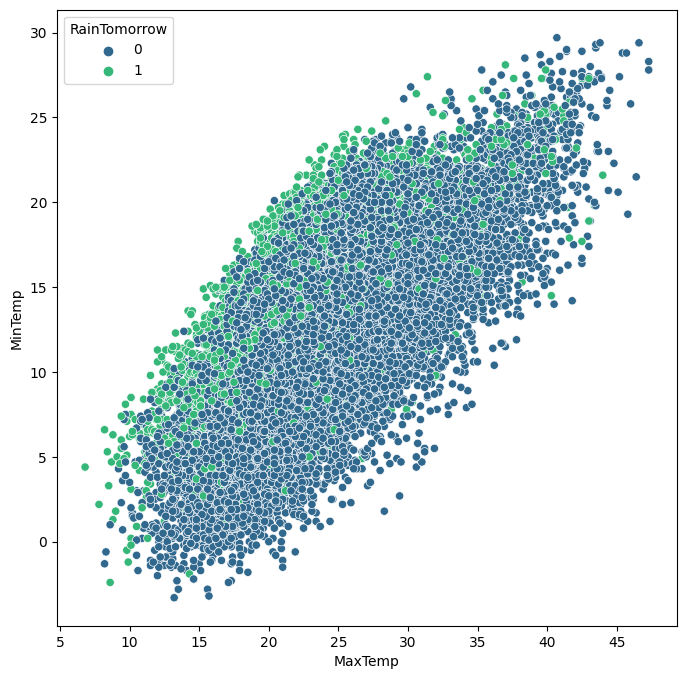

In [ ]:
plt.figure(figsize=(8,8))
sns.scatterplot(x = 'MaxTemp', y = 'MinTemp', hue = 'RainTomorrow', palette = 'viridis', data = df)

<Axes: xlabel='Humidity9am', ylabel='Temp9am'>

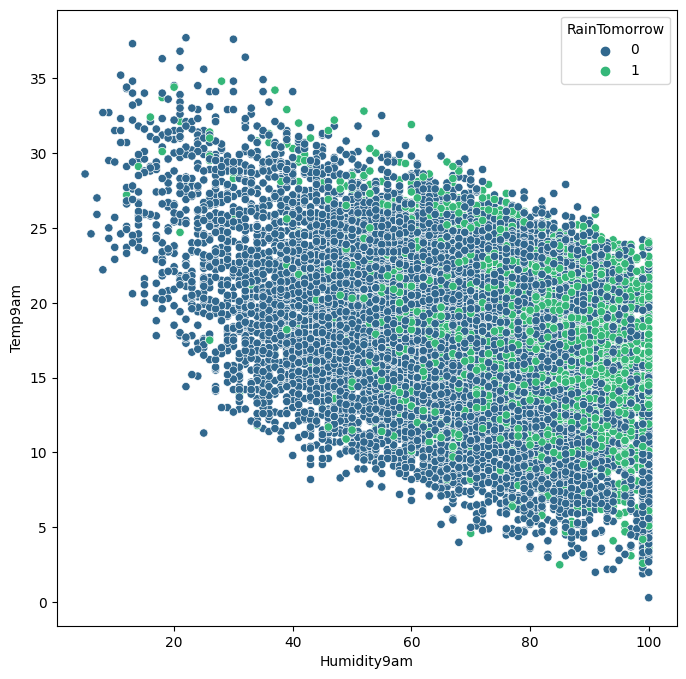

In [ ]:
plt.figure(figsize=(8,8))
sns.scatterplot(x = 'Humidity9am', y = 'Temp9am', hue = 'RainTomorrow', palette = 'viridis', data = df)

<Axes: >

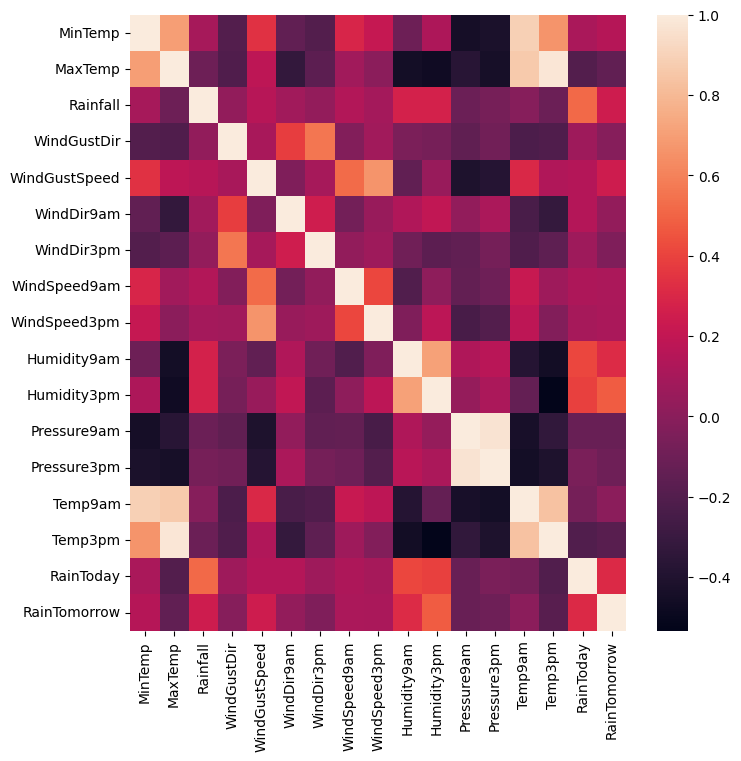

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr())

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [ ]:
predictions = dt.predict(X_test)

In [ ]:
print(confusion_matrix(Y_test, predictions))

[[3333  531]
 [ 476  546]]


In [ ]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      3864
           1       0.51      0.53      0.52      1022

    accuracy                           0.79      4886
   macro avg       0.69      0.70      0.69      4886
weighted avg       0.80      0.79      0.80      4886



In [ ]:
print(accuracy_score(Y_test, predictions))

0.7939009414654113


In [ ]:
#Using Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [ ]:
predictions = rf.predict(X_test)

In [ ]:
print(confusion_matrix(Y_test, predictions))

[[3689  175]
 [ 532  490]]


In [ ]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      3864
           1       0.74      0.48      0.58      1022

    accuracy                           0.86      4886
   macro avg       0.81      0.72      0.75      4886
weighted avg       0.85      0.86      0.84      4886



In [ ]:
print(accuracy_score(Y_test, predictions))

0.8553008595988538
